<a href="https://colab.research.google.com/github/wogur9503/AndroidGoogleMap/blob/master/bayesian%20Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 조건부 확률

어떤 사상 A 가 일어났다고 하는 조건 아래서 사상 B 가 일어나는 확률을 , A 의 조건 아래서 B 가 일어나는 "조건부 확률" 이라고 합니다.

P(B | A)    =  '4 이하의 눈이 나왔을 때 그 눈이 짝수 일 확률' =   2/4 

P(A | B)    = '짝수의 눈이 나왔을때 그 눈이 4이하일 확률' = 2/3

# 승법정리

P(A∩B) = P(A)P(B|A) = P(B)P(A|B) 

A 사상과 B 의 사상이 함께 일어날 확률은?  
- A 는 4 이하의 눈이 나오는 사상 : 4/6 

- B 는 짝수가 나오는 사상 : 3/6  

A * B = 1/3   


P(A)와 P(B|A) 를 곱하면 ?   네 1/3 이 됩니다. 

# 베이즈 추정(Bayesian Estimation)

추론 대상의 사전 확률과 추가적인 정보를 기반으로 해당 대상의 사후 확률을 추론하는 통계적 방법을 베이즈 추정(Bayesian Estimation)이라고 합니다.

베이즈 추정은 아래와 같이 계산할 수 있습니다.

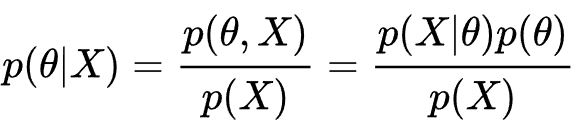

## Ex 01)
어떤 마을 전체 사람들의 10.5%가 암 환자이고, 89.5%가 암 환자가 아닙니다. 이 마을의 모든 사람에 대해 암 검진을 실시했다고 합시다. 암 검진시 양성 판정, 음성 판정 결과가 나올 수 있습니다. 하지만 검진이 100% 정확하지는 않고 약간의 오차가 있습니다. 암 환자 중 양성 판정을 받은 비율은 90.5%, 암 환자 중 음성 판정을 받은 비율은 9.5%, 암 환자가 아닌 사람 중 양성 판정을 받은 비율은 20.4%, 암 환자가 아닌 사람 중 음성 판정을 받은 비율은 79.6%입니다. 어떤 사람이 양성 판정을 받았을 때 이 사람이 암 환자일 확률은 얼마일까요?

약자 - C: Cancer(암 환자), P: Positive(양성), N: Negative(음성) <br>
P(C): 암 환자일 확률 = 0.105 <br>
P($\sim$C): 암 환자가 아닐 확률 = 0.895 <br>
P(P|C): 암 환자일 때 양성 판정을 받을 확률 = 0.905 (이를 민감도라고 합니다. sensitivity) <br>
P(N|C): 암 환자일 때 음성 판정을 받을 확률 = 0.095 <br>
P(P|$\sim$C): 암 환자가 아닐 때 양성 판정을 받을 확률 = 0.204 <br>
P(N|$\sim$C): 암 환자가 아닐 때 음성 판정을 받을 확률 = 0.796 (이를 특이도라고 합니다. specificity) <br>

이때 P(C|P): 어떤 사람이 양성 판정을 받았을 때 이 사람이 암 환자일 확률은?

베이즈의 추정에 의해 <br>

 - P(C|P) = P(P|C)*P(C) / P(P) <br>

 - 여기서, P(P) = P(P, C) + P(P,$\sim$C) = P(P|C)*P(C) + P(P|$\sim$C)*P($\sim$C)입니다. <br>

 - ,가 베이즈 추정식의 분자로 바뀐다. <br>

 - P(P), 즉 양성 판정을 받을 확률은 암 환자이자 양성 판정을 받을 확률(P(P, C))과 암 환자가 아닌데 양성 판정을 받을 확률(P(P, $\sim$C))의 합과 같습니다. <br>

 - 조건부 확률에 의해 P(P, C) = P(P|C)*P(C)이고, P(P, $\sim$C) = P(P|$\sim$C)*P($\sim$C)입니다. <br>

 - 따라서, P(C|P) = P(P|C)*P(C) / P(P) = 0.905$*$0.105 / (0.905$*$0.105 + 0.204$*$0.895) = 0.342입니다.<br>


In [4]:
# load dataset
import pandas as pd
df = pd.read_csv('cancer_test_data.csv')
df.head()

patient_id test_result  has_cancer
0       79452    Negative       False
1       81667    Positive        True
2       76297    Negative       False
3       36593    Negative       False
4       53717    Negative       False

In [12]:
# query : 데이터프레임에서 원하는 인덱스에서 원하는 값을 추출할 수 있음

# 양성 판정 받은 사람 중 암 환자일 확률: P(C|P)
df.query('test_result == "Positive"').has_cancer.mean()

0.34282178217821785

In [6]:
# 양성 판정 받은 사람 중 암 환자가 아닐 확률: P(~C|P)
(df.query('test_result == "Positive"')['has_cancer'] == False).mean()

0.6571782178217822

In [7]:
# 음성 판정 받은 사람 중 암 환자일 확률: P(C|N)
df.query('test_result == "Negative"').has_cancer.mean()

0.013770180436847104

In [8]:
# 음성 판정 받은 사람 중 암 환자가 아닐 확률: P(~C|N)
(df.query('test_result == "Negative"')['has_cancer'] == False).mean()

0.9862298195631529